In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn import svm as SVC,ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

##2 Load the dataset



In [2]:
df = pd.read_csv('MYDATASETS.csv')
df.head()

,Percentage at School,Percentage at College,Hours Studing per day,Interested in extracurricular activites?,Participated in any competition?,Self-learning capability?,Extra-courses did,Olympiads,Reading and Writing Skills,Job or Higher Studies?,...,Favorite Subject at College,Skills,Hours working per day,Interested Subjects,Workshops,Certifications,Name of University,Alternate University,Suggested Job Role,Course of Study
0,90,77,3,0,0,4,1,1,3,Higher Studies,...,maths,photography,4,Econometrics Mathematics,Industrial Training on Big Data,Google Professional Data Engineer,University of Engineering and Technology (Taxila),NED University of Engineering & Technology,Data Engineer,"CS, IT, SE"
1,54,66,1,1,0,4,1,0,3,Job,...,maths,programming,8,Computer Systems,Computer Architecture Education,AWS Certified Solution Architect,National University of Science & Technology (N...,University of the Punjab,Computer Engineer,"CS, CE, EE, CP, CIS"
2,64,60,1,0,0,4,1,1,2,Higher Studies,...,physics,gaming,8,Computer Networking,Training on Successful Networking,Cisco CCNA,NED University of Engineering & Technology,University of Engineering and Technology (Taxila),Network Engineer,"CS, IT, E, CRF"
3,72,54,3,1,0,4,0,0,5,Higher Studies,...,english,data analysis,7,Algorithmic Complexity,Coding Workshops,Microsoft Certified Solutions Developer,"University of Management & Technology, Lahore",Lahore University of Management Sciences,Programmer,"CS, IT, CIS, MIS"
4,80,75,1,0,0,4,0,0,2,Higher Studies,...,english,programming,8,Algorithmic Complexity,Coding Workshops,Microsoft Certified Solutions Developer,"University of Management & Technology, Lahore",Lahore University of Management Sciences,Programmer,"CS, IT, CIS, MIS"


In [3]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 3164 professionals and 27 features


### 3 data preprocessing

In [4]:
print("Columns in our dataset:", df.columns)

Columns in our dataset: Index(['Percentage at School', 'Percentage at College',
       'Hours Studing per day', 'Interested in extracurricular activites?',
       'Participated in any competition?', 'Self-learning capability?',
       'Extra-courses did', 'Olympiads', 'Reading and Writing Skills',
       'Job or Higher Studies?', 'Managerial or Technical',
       'Hard Worker or Smart Worker', 'Worked in teams ever?',
       'Are you Introvert?', 'School Major', 'Favorite Subject at School',
       'College Major', 'Favorite Subject at College', 'Skills',
       'Hours working per day', 'Interested Subjects', 'Workshops',
       'Certifications', 'Name of University', 'Alternate University',
       'Suggested Job Role', 'Course of Study'],
      dtype='object')


In [5]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Percentage at School', 'Percentage at College', 'Hours Studing per day', 'Interested in extracurricular activites?', 'Participated in any competition?', 'Self-learning capability?', 'Extra-courses did', 'Olympiads', 'Reading and Writing Skills', 'Worked in teams ever?', 'Are you Introvert?', 'Hours working per day']


List of Categorical features: 
 ['Job or Higher Studies?', 'Managerial or Technical', 'Hard Worker or Smart Worker', 'School Major', 'Favorite Subject at School', 'College Major', 'Favorite Subject at College', 'Skills', 'Interested Subjects', 'Workshops', 'Certifications', 'Name of University', 'Alternate University', 'Suggested Job Role', 'Course of Study']


In [6]:
#checking the null values
df.isnull().sum(axis=0)

Percentage at School                        0
Percentage at College                       0
Hours Studing per day                       0
Interested in extracurricular activites?    0
Participated in any competition?            0
Self-learning capability?                   0
Extra-courses did                           0
Olympiads                                   0
Reading and Writing Skills                  0
Job or Higher Studies?                      0
Managerial or Technical                     0
Hard Worker or Smart Worker                 0
Worked in teams ever?                       0
Are you Introvert?                          0
School Major                                0
Favorite Subject at School                  0
College Major                               0
Favorite Subject at College                 0
Skills                                      0
Hours working per day                       0
Interested Subjects                         0
Workshops                         

In [7]:
#distintction in the categorical feature or values means count the different answere response number
categorical_col = df[['Job or Higher Studies?', 'Managerial or Technical', 'Hard Worker or Smart Worker',
                      'School Major', 'Favorite Subject at School', 'College Major', 'Favorite Subject at College', 
                      'Skills', 'Interested Subjects', 'Workshops', 'Certifications', 'Name of University', 
                      'Alternate University', 'Suggested Job Role', 'Course of Study']]

for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

Higher Studies    1608
Job               1556
Name: Job or Higher Studies?, dtype: int64

Technical     1597
Managerial    1567
Name: Managerial or Technical, dtype: int64

Hard Worker     1623
Smart Worker    1541
Name: Hard Worker or Smart Worker, dtype: int64

Biology     1859
Computer    1305
Name: School Major, dtype: int64

maths               1779
physics              583
english              452
computer             153
urdu                 116
chemistry             43
pakistan studies      38
Name: Favorite Subject at School, dtype: int64

Pre-engineering     1782
Computer Science    1204
Humanities            90
Commerce              88
Name: College Major, dtype: int64

maths               1054
computer             932
english              362
physics              352
chemistry            106
pyhsics               98
pakistan studies      93
islamic studies       64
accounting            53
urdu                  50
Name: Favorite Subject at College, dtype: int64

testing    

<AxesSubplot:xlabel='Suggested Job Role', ylabel='count'>

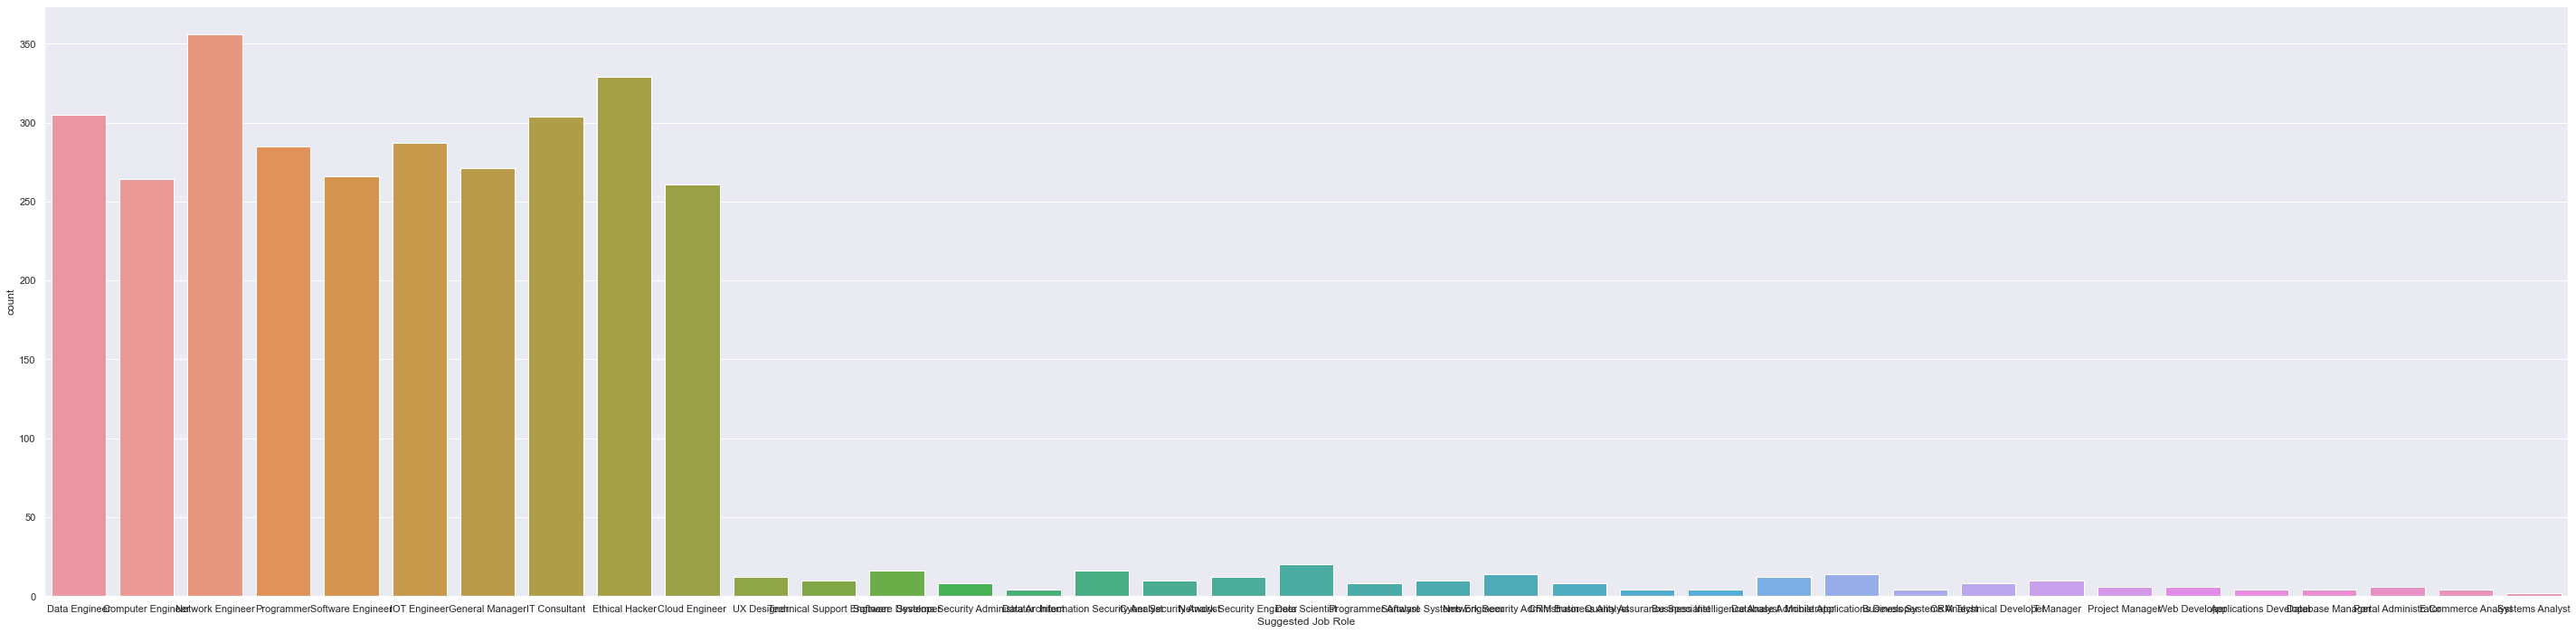

In [8]:
#checking data for the balancing
sns.set(rc={'figure.figsize':(50,12)})
sns.countplot(x = df["Suggested Job Role"])

<AxesSubplot:>

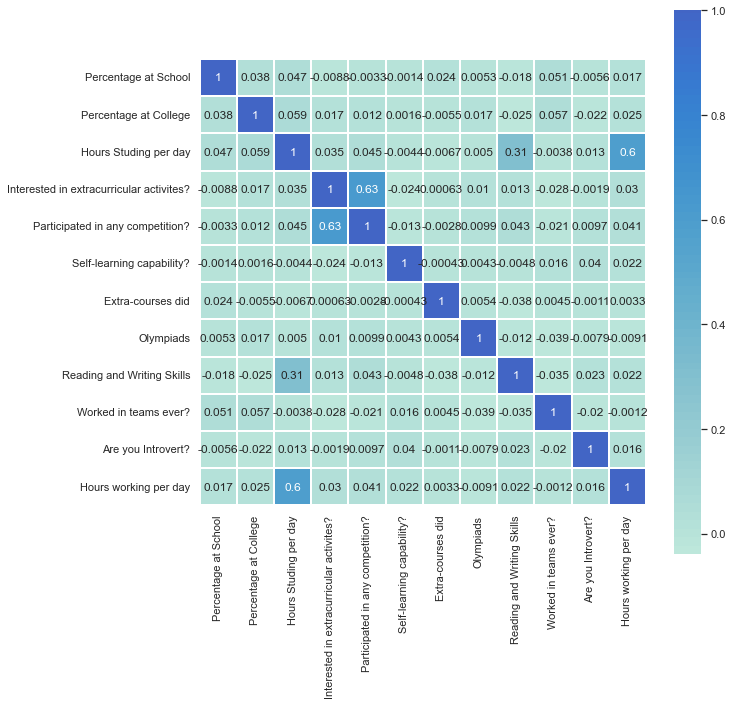

In [9]:
#corelation between numerical feature
corr = df[['Percentage at School', 'Percentage at College', 'Hours Studing per day',
           'Interested in extracurricular activites?', 'Participated in any competition?', 
           'Self-learning capability?', 'Extra-courses did', 'Olympiads', 'Reading and Writing Skills',
           'Worked in teams ever?', 'Are you Introvert?', 'Hours working per day']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

In [10]:
#visuallization of categorical veriables
print(df["Interested Subjects"].value_counts())

Computer Networking           353
Surveillance                  325
Fixing Issues                 310
Econometrics Mathematics      299
Automation                    292
Algorithmic Complexity        287
Economics                     269
Introduction to Algorithms    265
Computer Systems              264
Cloud Computing               264
Security Analysis              26
Data Science                   20
Management                     16
Software Development           16
Business Analysis              16
Application Development        14
Network Administration         14
Data Administration            12
Network Engineering            12
Designing                      12
System Engineering             10
Problem Solving                10
Algorithm Complexity            8
Security Administration         8
Technical Development           8
Web Development                 6
Portal Administration           6
Architectural Domains           4
Quality Assurance               4
Applications D

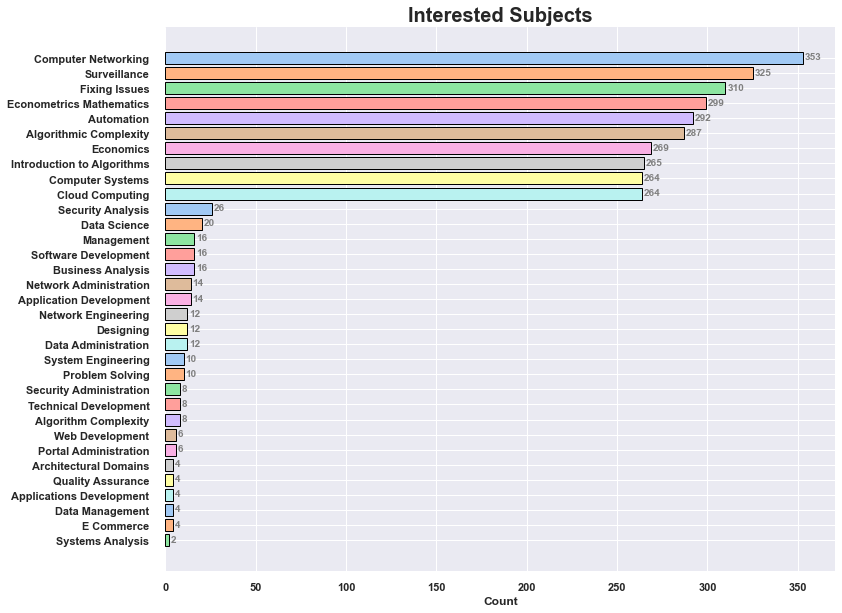

In [11]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,10))

# Horizontal Bar Plot
title_cnt=df["Interested Subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [12]:
print(df["College Major"].value_counts())

Pre-engineering     1782
Computer Science    1204
Humanities            90
Commerce              88
Name: College Major, dtype: int64


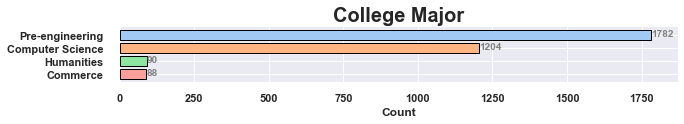

In [13]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,1))

# Horizontal Bar Plot
title_cnt=df["College Major"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('College Major',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [14]:
print(df["Certifications"].value_counts())

Cisco CCNA                                         353
Certified Ethical Hacker                           326
IT Consultant Certification                        310
Google Professional Data Engineer                  299
Certified IoT Professional Program                 292
Microsoft Certified Solutions Developer            287
Certified General Manager                          268
AWS Certified Solution Architect                   265
CERTIFIED SOFTWARE ENGINEER                        264
Associate Cloud Engineer                           264
Google Developers Certification                     22
Certified Analytics Professional                    20
Certified Associate in PM                           16
Certified Database Administrator                    16
Information Security Certification                  16
Certified Application developer                     14
Network Security certification                      14
Certified Network Security Engineer                 12
Certified 

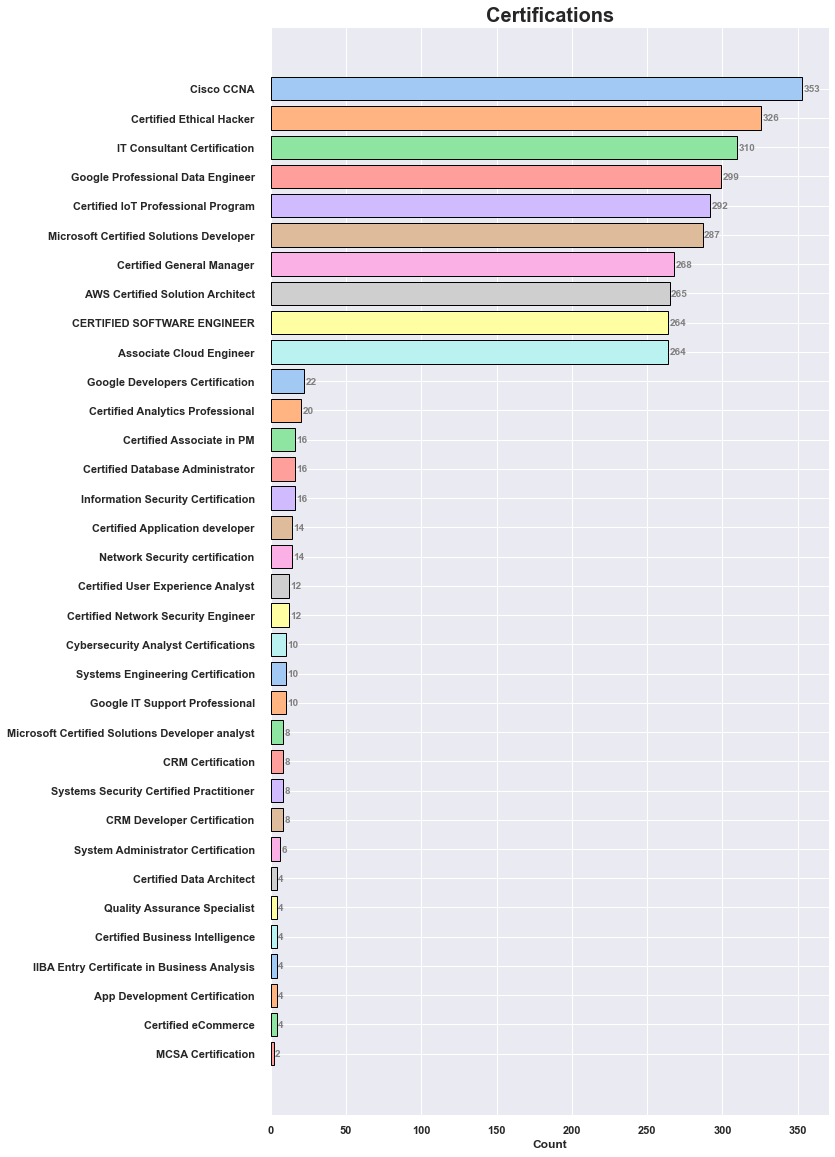

In [15]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,20))

# Horizontal Bar Plot
title_cnt=df.Certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [16]:
print(df["Workshops"].value_counts())

Training on Successful Networking           357
Ethical Hacking Workshop                    329
Industrial Training on Big Data             319
System Designing                            312
Expert Lecture on IOT                       288
Effective Decision Making                   288
Coding Workshops                            282
Effective Problem Solving                   275
Cloud Computing Workshop                    266
Computer Architecture Education             262
System Security Design Specialization        28
Logic Development Workshop                   26
Network Security Specialization              26
Training on Business Analysis                22
Mobile Applications Development Workshop     14
UX Designing Workshop                        12
Database Administration Workshop             12
Cyber Security Specialization                10
Effective Analysis Techniques                 8
Microsoft CRM Training                        8
Workshop on Web Development             

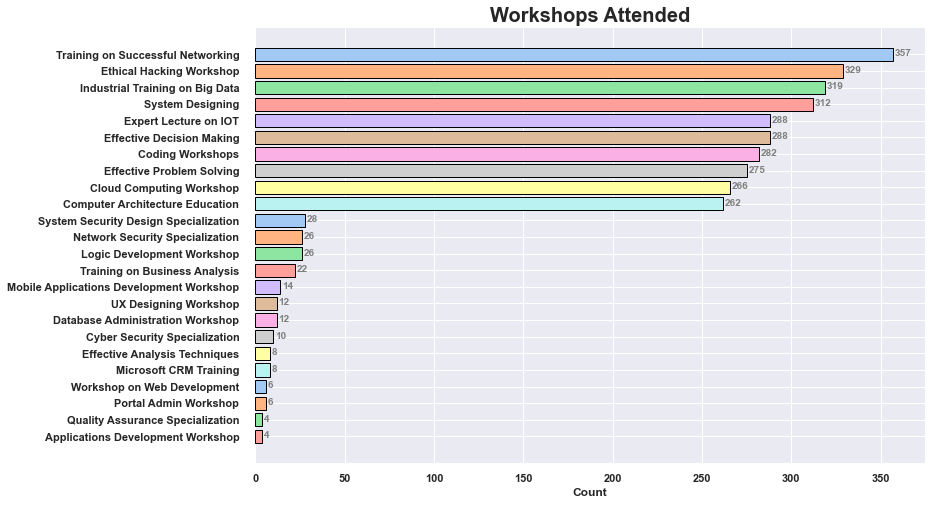

In [17]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,8))

# Horizontal Bar Plot
title_cnt=df.Workshops.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Workshops Attended',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [18]:
print(df["Job or Higher Studies?"].value_counts())

Higher Studies    1608
Job               1556
Name: Job or Higher Studies?, dtype: int64


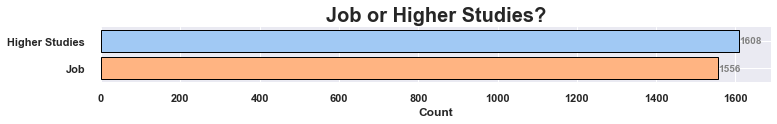

In [19]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,1))

# Horizontal Bar Plot
title_cnt=df["Job or Higher Studies?"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Job or Higher Studies?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [20]:
print(df["Hard Worker or Smart Worker"].value_counts())

Hard Worker     1623
Smart Worker    1541
Name: Hard Worker or Smart Worker, dtype: int64


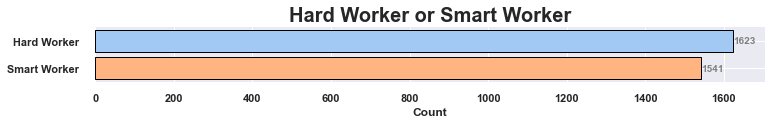

In [21]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,1))

# Horizontal Bar Plot
title_cnt=df["Hard Worker or Smart Worker"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Hard Worker or Smart Worker',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [22]:
print(df["Name of University"].value_counts())

NED University of Engineering & Technology                            353
COMSATS Institute of Information Technology                           327
BUITEMS, Quetta                                                       308
University of Engineering and Technology (Taxila)                     304
Mehran University of Engineering and Technology                       292
University of Management & Technology, Lahore                         282
Lahore University of Management Sciences                              271
FAST National University                                              265
National University of Science & Technology (NUST)                    265
Qurtuba University of Science and Information Technology              261
Pakistan Institute of Engineering and Applied Sciences                 46
Quaid-e-Awam University of Engineering, Science and Technology         42
City University of Science and Information Technology                  40
Sir Syed University of Engineering and

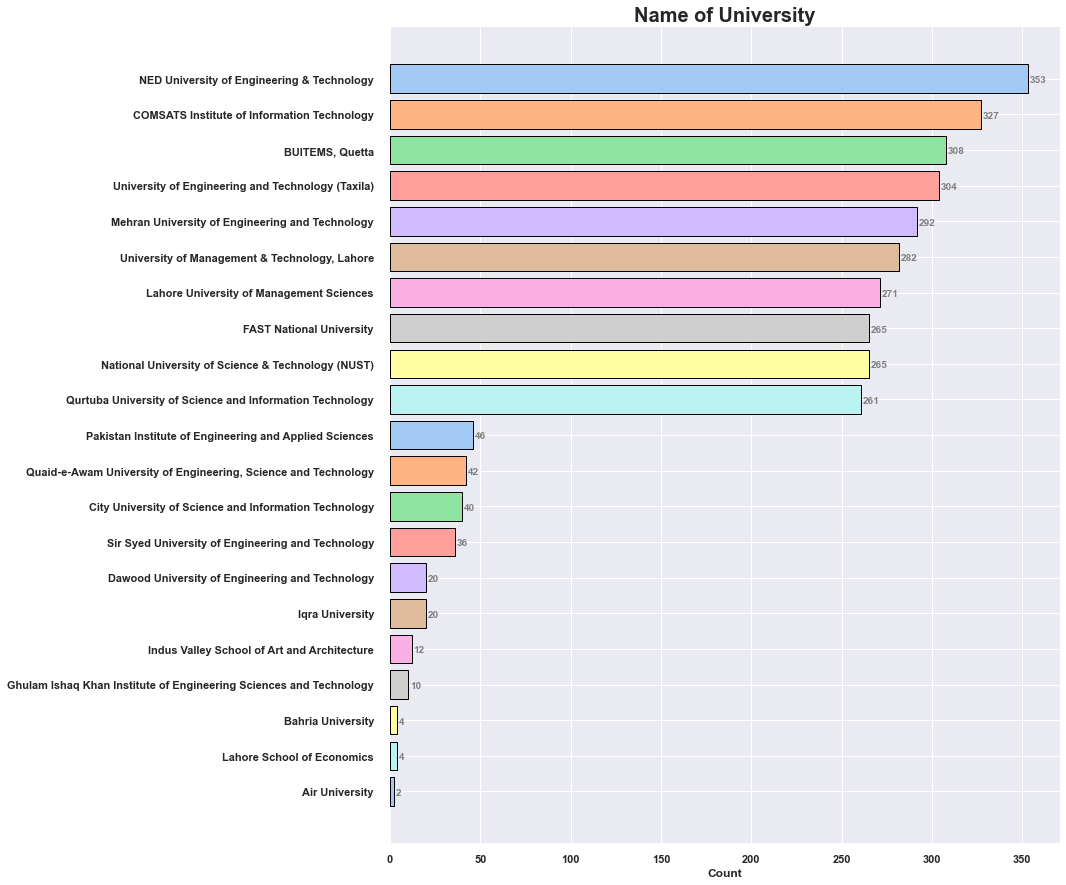

In [23]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,15))

# Horizontal Bar Plot
title_cnt=df["Name of University"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Name of University',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [24]:
print(df["Suggested Job Role"].value_counts())

Network Engineer                  356
Ethical Hacker                    329
Data Engineer                     305
IT Consultant                     304
IOT Engineer                      287
Programmer                        285
General Manager                   271
Software Engineer                 266
Computer Engineer                 264
Cloud Engineer                    261
Data Scientist                     20
Information Security Analyst       16
Software Developer                 16
Network Security Administrator     14
Mobile Applications Developer      14
Database Administrator             12
Network Security Engineer          12
UX Designer                        12
Software Systems Engineer          10
IT Manager                         10
Technical Support Engineer         10
Cyber Security Analyst             10
CRM Business Analyst                8
Programmer Analyst                  8
CRM Technical Developer             8
Systems Security Administrator      8
Portal Admin

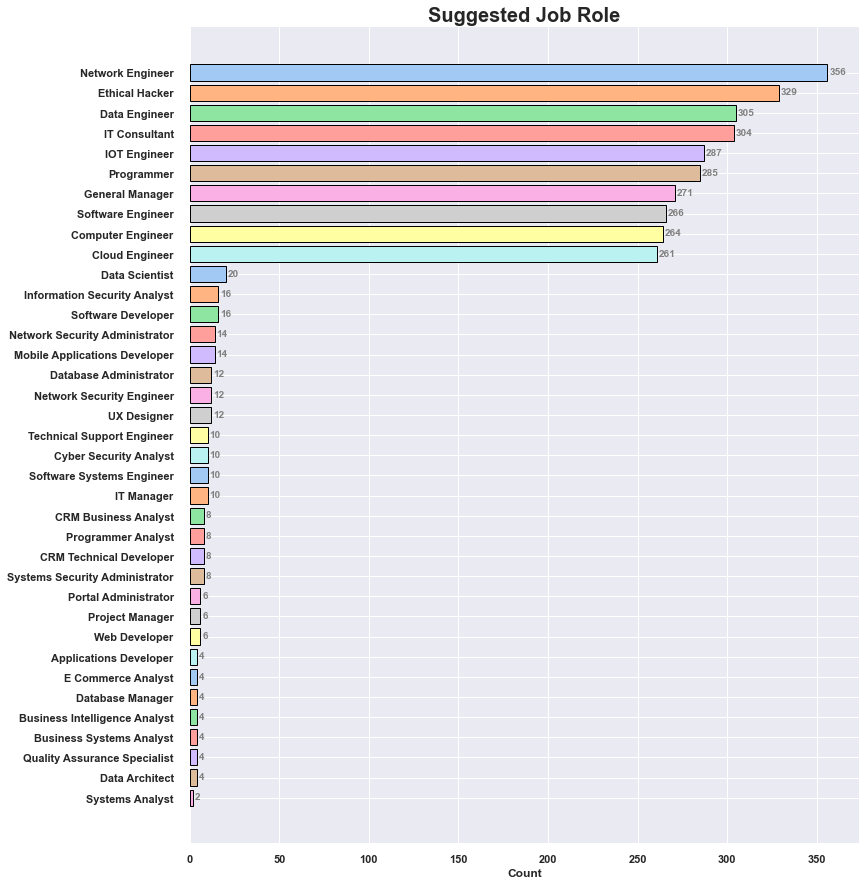

In [25]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,15))

# Horizontal Bar Plot
title_cnt=df["Suggested Job Role"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Suggested Job Role',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [26]:
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Job or Higher Studies?', 'Managerial or Technical', 'Hard Worker or Smart Worker', 'School Major', 'Favorite Subject at School', 'College Major', 'Favorite Subject at College', 'Skills', 'Interested Subjects', 'Workshops', 'Certifications', 'Name of University', 'Alternate University', 'Suggested Job Role', 'Course of Study']


In [27]:
category_cols = df[['School Major', 'Favorite Subject at School', 'College Major', 'Favorite Subject at College',
                    'Skills', 'Interested Subjects', 'Workshops', 'Certifications', 'Name of University',
                    'Alternate University', 'Suggested Job Role', 'Course of Study' ]]
for i in category_cols:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes

print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Job or Higher Studies?', 'Managerial or Technical', 'Hard Worker or Smart Worker']


In [28]:
#for the categorical feature use dummy veriable
print(df['Managerial or Technical'].unique())
print(df['Hard Worker or Smart Worker'].unique())
print(df['Job or Higher Studies?'].unique())

['Managerial' 'Technical']
['Hard Worker' 'Smart Worker']
['Higher Studies' 'Job']


In [29]:
df = pd.get_dummies(df, columns=['Job or Higher Studies?', 'Managerial or Technical', 'Hard Worker or Smart Worker'],
                    prefix=["A", "B" , "C"])
df.head()

,Percentage at School,Percentage at College,Hours Studing per day,Interested in extracurricular activites?,Participated in any competition?,Self-learning capability?,Extra-courses did,Olympiads,Reading and Writing Skills,Worked in teams ever?,...,Name of University_code,Alternate University_code,Suggested Job Role_code,Course of Study_code,A_Higher Studies,A_Job,B_Managerial,B_Technical,C_Hard Worker,C_Smart Worker
0,90,77,3,0,0,4,1,1,3,1,...,19,9,9,7,1,0,1,0,1,0
1,54,66,1,1,0,4,1,0,3,0,...,14,19,6,3,0,1,0,1,1,0
2,64,60,1,0,0,4,1,1,2,0,...,13,17,21,5,1,0,1,0,1,0
3,72,54,3,1,0,4,0,0,5,1,...,20,7,25,4,1,0,1,0,0,1
4,80,75,1,0,0,4,0,0,2,1,...,20,7,25,4,1,0,1,0,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Percentage at School                      3164 non-null   int64   
 1   Percentage at College                     3164 non-null   int64   
 2   Hours Studing per day                     3164 non-null   int64   
 3   Interested in extracurricular activites?  3164 non-null   int64   
 4   Participated in any competition?          3164 non-null   int64   
 5   Self-learning capability?                 3164 non-null   int64   
 6   Extra-courses did                         3164 non-null   int64   
 7   Olympiads                                 3164 non-null   int64   
 8   Reading and Writing Skills                3164 non-null   int64   
 9   Worked in teams ever?                     3164 non-null   int64   
 10  Are you Introvert?      

In [31]:

print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Percentage at School', 'Percentage at College', 'Hours Studing per day', 'Interested in extracurricular activites?', 'Participated in any competition?', 'Self-learning capability?', 'Extra-courses did', 'Olympiads', 'Reading and Writing Skills', 'Worked in teams ever?', 'Are you Introvert?', 'Hours working per day', 'School Major_code', 'Favorite Subject at School_code', 'College Major_code', 'Favorite Subject at College_code', 'Skills_code', 'Interested Subjects_code', 'Workshops_code', 'Certifications_code', 'Name of University_code', 'Alternate University_code', 'Suggested Job Role_code', 'Course of Study_code', 'A_Higher Studies', 'A_Job', 'B_Managerial', 'B_Technical', 'C_Hard Worker', 'C_Smart Worker']


In [32]:
#ml model
feed = df[['Percentage at School', 'Percentage at College', 'Hours Studing per day', 
           'Interested in extracurricular activites?', 'Participated in any competition?',
           'Self-learning capability?', 'Extra-courses did', 'Olympiads', 'Reading and Writing Skills',
           'Worked in teams ever?', 'Are you Introvert?', 'Hours working per day', 'School Major_code', 
           'Favorite Subject at School_code', 'College Major_code', 'Favorite Subject at College_code', 'Skills_code', 
           'Interested Subjects_code', 'Workshops_code', 'Certifications_code', 'Name of University_code', 
           'Alternate University_code', 'Suggested Job Role_code', 'Course of Study_code', 'A_Higher Studies', 
           'A_Job', 'B_Managerial', 'B_Technical', 'C_Hard Worker', 'C_Smart Worker']]

# Taking all independent variable columns
df_train_x = feed.drop('Suggested Job Role_code',axis = 1)

# Target variable column
df_train_y = feed['Suggested Job Role_code']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

# decisiontree

In [33]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)


confusion matrics= [[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
  
accuracy= 9.857819905213269


In [34]:
userdata = [['0','2','0','0','0','0','0', '0', '0', '0', '0', '0','0', 
                    '0','0','0','0','0','0','0','0','0','0', '0', '0','0','1','1', '2']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

[15]
Probabilities of all classes:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Probability of Predicted class :  1.0


C:\Users\suman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\suman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# SVM algo

In [35]:
import sklearn 
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
svm_y_pred = clf.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*10)

confusion matrics= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
  
accuracy= 9.304897314375987


In [36]:
ynewclass = clf.predict(userdata)
ynew = clf.decision_function(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

[5]
Probabilities of all classes:  [[ 4.6844381  -0.32292694  3.68047368 12.70787301 15.77757933 36.32004499
  35.31987108 15.99779369  1.67732876 29.32210082 27.31420978 23.29447412
   7.68639499  5.68204703 34.3214175  31.32136294 32.3198838  25.31542864
  18.22109632 18.79577827 26.30573227 29.32022661 20.22142599 23.27047478
   8.68493797 30.31914936 14.73433859  9.68964867  2.677604   22.23892431
  32.32066981 11.69369839  0.67720885 10.69248516 17.83929964 18.84921582
   6.68206198]]
Probability of Predicted class :  36.320044990921026


C:\Users\suman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\suman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [37]:
#X_train,X_test,y_train,y_test=train_test_split(x ,y,test_size=0.2,random_state=10) 

# Random forest Ml Algorithm

In [38]:
# pickle to save the model  dump is the function / we can say it is object then create a new file with extension pkl
# here the open (file name is the syntext to create a file where the model save file name "mysave model and the wb is
# write binary" )
#import pickle 
#pickle.dump(dtree,open('MySaveModel.pkl','wb'))

In [39]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(x_train, y_train)
rfc_y_pred = rf.predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("confusion matrics=",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy*100)

confusion matrics= [[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
  
accuracy= 99.0521327014218


In [40]:
# to save the model in the pickle  file name is mysavemodel and wb is the write binery
import pickle
pickle.dump(dtree,open('MySaveModel.pkl','wb'))

In [41]:
# XG boost
# classification using xgboost
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [42]:
x_train.shape

(2531, 29)

In [43]:
# converting values of training and testing data into int64 datatype
x_train=pd.to_numeric(x_train.values.flatten())

In [44]:
x_train=x_train.reshape((2531,29))

In [45]:
# importing and defining xgboost functions
from xgboost import XGBClassifier

In [46]:
xgmodel = XGBClassifier()
# training and testing with xg boost
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [47]:
xgb_y_pred = clf.predict(x_test)

In [48]:
# calculating confusion matrix and accuracy after boosting
xgb_cm = confusion_matrix(y_test,xgb_y_pred)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred)

In [49]:
# print("confusion matrics=",xgb_cm)
# print("  ")
print("accuracy=",xgb_accuracy*100)

accuracy= 93.04897314375987


# logistic regression classifier


In [53]:

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\suman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98
